In [23]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.stats as stats

from hotutils import areamean_utils as am 
from hotutils import season_utils as sc
from hotutils import corrplot_utils as cplot
from hotutils import lineplot_utils as lplot

import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Arial')

### Model name

In [24]:
model5 = 'ACCESS1-0 ACCESS1-3 bcc-csm1-1-m bcc-csm1-1 BNU-ESM CanESM2 CCSM4 CESM1-BGC CMCC-CESM CMCC-CM CMCC-CMS CNRM-CM5 CSIRO-Mk3-6-0 FGOALS-g2 GFDL-CM3 GFDL-ESM2G GFDL-ESM2M HadGEM2-CC HadGEM2-ES inmcm4 IPSL-CM5A-LR IPSL-CM5A-MR IPSL-CM5B-LR MIROC-ESM-CHEM MIROC-ESM MIROC5 MPI-ESM-LR MPI-ESM-MR MRI-CGCM3 NorESM1-M'
model6 = 'ACCESS-CM2 ACCESS-ESM1-5 AWI-CM-1-1-MR BCC-CSM2-MR CanESM5 CMCC-ESM2 CNRM-CM6-1 CNRM-CM6-1-HR CNRM-ESM2-1 EC-Earth3 EC-Earth3-Veg FGOALS-g3 GFDL-CM4 GFDL-ESM4 GISS-E2-1-G HadGEM3-GC31-LL HadGEM3-GC31-MM INM-CM4-8 INM-CM5-0 IPSL-CM6A-LR MIROC6 MPI-ESM1-2-HR MPI-ESM1-2-LR MRI-ESM2-0 NESM3 NorESM2-LM NorESM2-MM'
models5 = model5.split()
models6 = model6.split()
time_his = slice('1986','2005')
time_ssp = slice('2080','2099')
nlat,slat = slice(0,25),slice(-25,0)
models = models6 + models5

### Read files

In [25]:
path5_tm = '/home/donghq/dong_hq/heatwave/cmip5/tasmax/MME/'
path6_tm = '/home/donghq/dong_hq/heatwave/hist_ssp/tasmax/MME/'
ds_tmm5  = xr.open_dataset(path5_tm+'tasmax_Amon_30MME_historical_rcp85_195501-209912_regrid.nc').tasmax
ds_tmm6  = xr.open_dataset(path6_tm+'tasmax_Amon_27MME_historcial_ssp585_197901-210012_regrid.nc').tasmax

In [26]:
#NHL
tmm5_nh_his = am.ram(ds_tmm5.sel(time=time_his,lat=nlat),'land')
tmm5_nh_ssp = am.ram(ds_tmm5.sel(time=time_ssp,lat=nlat),'land')
tmm6_nh_his = am.ram(ds_tmm6.sel(time=time_his,lat=nlat),'land')
tmm6_nh_ssp = am.ram(ds_tmm6.sel(time=time_ssp,lat=nlat),'land')
#SHL
tmm5_sh_his = am.ram(ds_tmm5.sel(time=time_his,lat=slat),'land')
tmm5_sh_ssp = am.ram(ds_tmm5.sel(time=time_ssp,lat=slat),'land')
tmm6_sh_his = am.ram(ds_tmm6.sel(time=time_his,lat=slat),'land')
tmm6_sh_ssp = am.ram(ds_tmm6.sel(time=time_ssp,lat=slat),'land')

In [27]:
#Concat CMIP5 and CMIP6
tmm_nh_his = xr.concat([tmm6_nh_his,tmm5_nh_his],dim='model')
tmm_nh_ssp = xr.concat([tmm6_nh_ssp,tmm5_nh_ssp],dim='model')
tmm_sh_his = xr.concat([tmm6_sh_his,tmm5_sh_his],dim='model')
tmm_sh_ssp = xr.concat([tmm6_sh_ssp,tmm5_sh_ssp],dim='model')

### TX99p changes 

In [28]:
tma5_nh_rp99 = np.load('data/tma5_nh_rp99.npy')
tma5_sh_rp99 = np.load('data/tma5_sh_rp99.npy')
tma6_nh_rp99 = np.load('data/tma6_nh_rp99.npy')
tma6_sh_rp99 = np.load('data/tma6_sh_rp99.npy')
tma_nh_rp99  = np.append(tma6_nh_rp99,tma5_nh_rp99)
tma_sh_rp99  = np.append(tma6_sh_rp99,tma5_sh_rp99)

In [29]:
tmax_nh_amj  = sc.avg_amj(tmm_nh_his,tmm_nh_ssp)
tmax_sh_son  = sc.avg_son(tmm_sh_his,tmm_sh_ssp)

In [30]:
#calculate correlation
corr_nh_amj = stats.pearsonr(tmax_nh_amj,tma_nh_rp99)
corr_sh_son = stats.pearsonr(tmax_sh_son,tma_sh_rp99)

### TXp percentile

In [31]:
dtmaxn = xr.open_dataset('data/fig2_dtmaxn.nc').tx
dtmaxs = xr.open_dataset('data/fig2_dtmaxs.nc').tx
tmaxn  = xr.open_dataset('data/fig2_tmaxn.nc').tx
tmaxs  = xr.open_dataset('data/fig2_tmaxs.nc').tx

dtmaxn_mean, dtmaxn_ud = lplot.MME(dtmaxn)
dtmaxs_mean, dtmaxs_ud = lplot.MME(dtmaxs)
tmaxn_mean,  tmaxn_ud  = lplot.MME(tmaxn)
tmaxs_mean,  tmaxs_ud  = lplot.MME(tmaxs)

### Plot

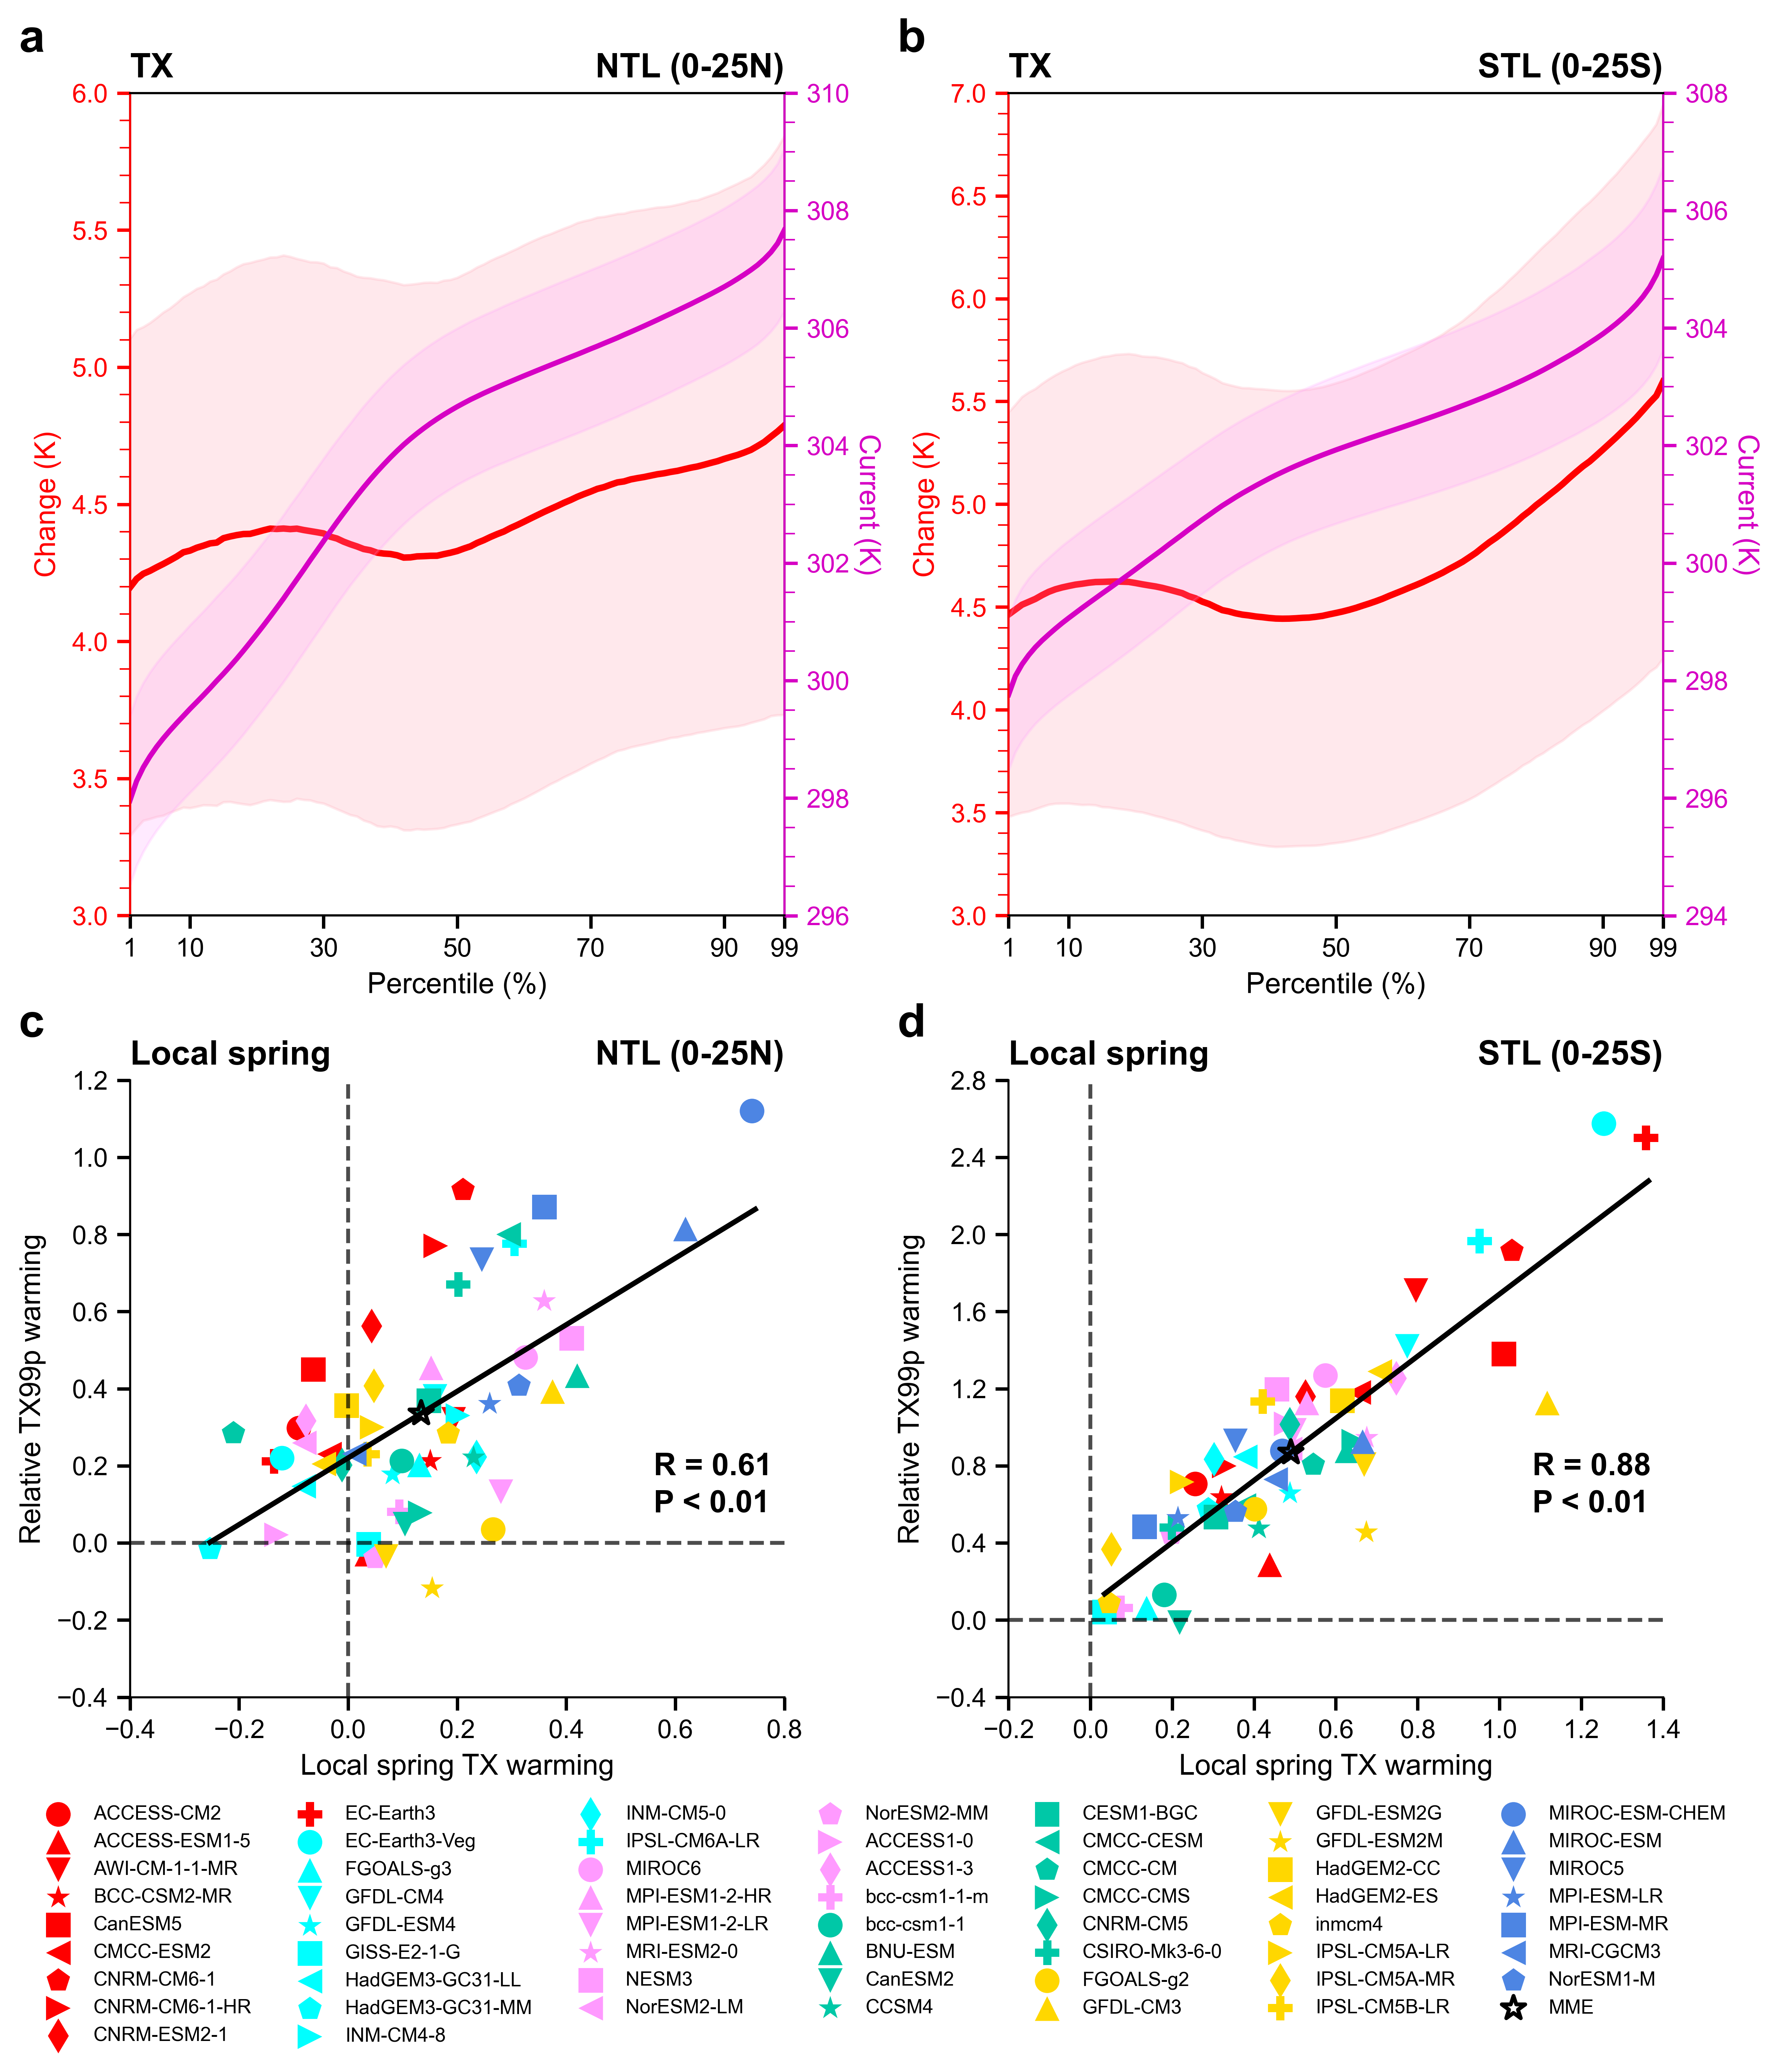

In [32]:
ft  = 10
fig = plt.figure(figsize=(10,11),dpi=500)
plt.rcParams['hatch.color'] = 'white'
plt.rcParams['hatch.linewidth'] = 0.1

lplot.pt_fig(fig,dtmaxn_mean[1:-1],tmaxn_mean[1:-1],dtmaxn_ud[:,1:-1],tmaxn_ud[:,1:-1],[3,6],[296,310],0.5,2,[0.17,0.05],'a','TX','','NTL (0-25N)','Change (K)','Current (K)',ft,0.1,0.45,0.55,0.95)
lplot.pt_fig(fig,dtmaxs_mean[1:-1],tmaxs_mean[1:-1],dtmaxs_ud[:,1:-1],tmaxs_ud[:,1:-1],[3,7],[294,308],0.5,2,[0.17,0.05],'b','TX','','STL (0-25S)','Change (K)','Current (K)',ft,0.57,0.92,0.55,0.95)

ax1 = cplot.ax_corr(fig,tmax_nh_amj,tma_nh_rp99,[-0.4,0.8],[-0.4,1.2],0.2,0.2,0.8,0.3,[0.17,0.07],corr_nh_amj,models,
             ['Local spring TX warming','Relative TX99p warming'],'c','Local spring','','NTL (0-25N)',False,ft,0.1,0.45,0.17,0.47,sft=90)
ax2 = cplot.ax_corr(fig,tmax_sh_son,tma_sh_rp99,[-0.2,1.4],[-0.4,2.8],0.2,0.4,0.8,0.3,[0.17,0.07],corr_sh_son,models,
             ['Local spring TX warming','Relative TX99p warming'],'d','Local spring','','STL (0-25S)',False,ft,0.57,0.92,0.17,0.47,sft=90)

ax1.legend(loc='center',bbox_to_anchor=(1.15, -0.37),ncol = 7,fontsize=ft-2.5,frameon=False)

plt.show()